#Self Organizing Map

##Install MiniSom Package

In [4]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=345a2e649f363e73275e014e2df370f04b8e444edb02a3498b8cf49f813aa51b
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built MiniSom


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the libraries


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [7]:
dataset = pd.read_csv('/content/drive/MyDrive/photography/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


from minisom import Minisom

In [17]:
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len = 15,sigma =1.0,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X,num_iteration= 100)


##Visualizing the results


bone = to make the grid
.T = transpose

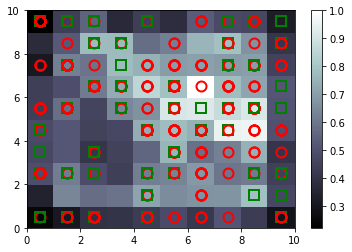

In [19]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers =['o','s']
colors =['r','g']
for i,x in enumerate(X):
  w= som.winner(x)
  plot(w[0]+0.5,w[1]+0.5,markers[y[i]],markeredgecolor=colors[y[i]],markerfacecolor='None',markersize =10,markeredgewidth=2)
  show()

## Finding the frauds


In [24]:
mappings =som.win_map(X)
frauds = np.concatenate((mappings[(6,6)],mappings[(8,4)],mappings[(7,4)]),axis = 0)
frauds= sc.inverse_transform(frauds)


##Printing the Fraunch Clients

In [25]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15605872
15570990
15618703
15677395
15583724
15699963
15667588
